# PART3 パラメータをチューニングしてみよう

## おまじない

In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [120]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample = pd.read_csv('submit_sample.csv', header=None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [121]:
trainX = train.iloc[:, :-1]
trainX

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown


## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [122]:
y = train['y']

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [123]:
testX = test.copy()

In [124]:
print(trainX.shape)
print(testX.shape)

(27100, 16)
(18050, 16)


## データ加工

### ビニング

In [125]:
age_bining = pd.cut(train['age'], [0,20,30,40,50,60,100])
age_bining

id
0        (30, 40]
1        (20, 30]
2        (30, 40]
3        (30, 40]
4        (40, 50]
           ...   
27095    (30, 40]
27096    (30, 40]
27097    (30, 40]
27098    (20, 30]
27099    (30, 40]
Name: age, Length: 27100, dtype: category
Categories (6, interval[int64]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

In [126]:
duration_bining = pd.cut(train['duration'], [-1, 100,200,300,400,500,600,700,800,900,1000,5000])
duration_bining

id
0        (100, 200]
1        (100, 200]
2        (300, 400]
3        (600, 700]
4        (100, 200]
            ...    
27095    (300, 400]
27096    (100, 200]
27097    (100, 200]
27098    (100, 200]
27099    (300, 400]
Name: duration, Length: 27100, dtype: category
Categories (11, interval[int64]): [(-1, 100] < (100, 200] < (200, 300] < (300, 400] ... (700, 800] < (800, 900] < (900, 1000] < (1000, 5000]]

In [127]:
trainX['age_bining'] = pd.cut(train['age'], [0,20,30,40,50,60,100])
testX['age_bining'] = pd.cut(test['age'], [0,20,30,40,50,60,100])

In [128]:
trainX['duration_bining'] = pd.cut(train['duration'], [-1, 100,200,300,400,500,600,700,800,900,1000,5000])
testX['duration_bining'] = pd.cut(test['duration'], [-1, 100,200,300,400,500,600,700,800,900,1000,5000])


In [132]:
trainX

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_bining,duration_bining
id,,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,"(30, 40]","(100, 200]"
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,"(20, 30]","(100, 200]"
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,"(30, 40]","(300, 400]"
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,"(30, 40]","(600, 700]"
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,"(40, 50]","(100, 200]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,"(30, 40]","(300, 400]"
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,"(30, 40]","(100, 200]"
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown,"(30, 40]","(100, 200]"


In [134]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27100 entries, 0 to 27099
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              27100 non-null  int64   
 1   job              27100 non-null  object  
 2   marital          27100 non-null  object  
 3   education        27100 non-null  object  
 4   default          27100 non-null  object  
 5   balance          27100 non-null  int64   
 6   housing          27100 non-null  object  
 7   loan             27100 non-null  object  
 8   contact          27100 non-null  object  
 9   day              27100 non-null  int64   
 10  month            27100 non-null  object  
 11  duration         27100 non-null  int64   
 12  campaign         27100 non-null  int64   
 13  pdays            27100 non-null  int64   
 14  previous         27100 non-null  int64   
 15  poutcome         27100 non-null  object  
 16  age_bining       27100 non-null  categor

## trainXとtestXをダミー変数化しましょう

In [129]:
cols_o = train.select_dtypes(include='object').columns.tolist()
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [136]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)
trainX

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,"duration_bining_(100, 200]","duration_bining_(200, 300]","duration_bining_(300, 400]","duration_bining_(400, 500]","duration_bining_(500, 600]","duration_bining_(600, 700]","duration_bining_(700, 800]","duration_bining_(800, 900]","duration_bining_(900, 1000]","duration_bining_(1000, 5000]"
id,,,,,,,,,,,,,,,,,,,,,
0,31,12294,21,101,3,498,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,29,43027,22,158,2,702,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,35,12252,11,351,1,826,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,31,99121,16,658,2,120,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,48,42005,3,177,1,273,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,26661,27,345,4,425,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
27096,35,42150,27,121,1,719,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
27097,35,34531,28,177,2,121,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [131]:
import category_encoders as ce
ce_ohe = ce.OneHotEncoder(handle_unknown='impute')
ce_ohe.fit(pd.concat([trainX, testX], axis=0))

trainX = ce_ohe.transform(trainX)
testX = ce_ohe.transform(testX)

### Objectだけにするとやはり精度が下がる
# ce_ohe.fit(pd.concat([trainX[cols_o], testX[cols_o]], axis=0))

# trainX = ce_ohe.transform(trainX[cols_o])
# testX = ce_ohe.transform(testX[cols_o])


TypeError: 'IntervalArray.fillna' only supports filling with a scalar 'pandas.Interval'. Got a 'float' instead.

In [70]:
trainX

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_10,month_11,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,0,0,0,0,0,0,0,0,...,0,0,101,3,498,0,1,0,0,0
1,29,0,1,0,0,0,0,0,0,0,...,0,0,158,2,702,0,0,1,0,0
2,35,0,0,1,0,0,0,0,0,0,...,0,0,351,1,826,0,0,0,1,0
3,31,0,0,0,1,0,0,0,0,0,...,0,0,658,2,120,0,0,0,1,0
4,48,0,0,0,0,1,0,0,0,0,...,0,0,177,1,273,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,0,0,0,0,0,1,0,0,0,...,0,0,345,4,425,0,0,1,0,0
27096,35,1,0,0,0,0,0,0,0,0,...,0,0,121,1,719,0,0,1,0,0
27097,35,1,0,0,0,0,0,0,0,0,...,0,0,177,2,121,0,0,1,0,0


In [71]:
trainX.shape

(27100, 50)

In [72]:
testX.shape

(18050, 50)

## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [73]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [74]:
cross_validate(clf1, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.06000042, 0.05600643, 0.04400849, 0.04799914, 0.04400849]),
 'score_time': array([0.00400019, 0.00399327, 0.00399327, 0.00400019, 0.00399327]),
 'test_score': array([0.69029389, 0.67619773, 0.69763379, 0.69029574, 0.68916622]),
 'train_score': array([0.68456481, 0.69445926, 0.68915697, 0.68453695, 0.68482895])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [75]:
clf2 = DT(max_depth=10, min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [76]:
cross_validate(clf2, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.14404058, 0.1280005 , 0.09197307, 0.13599038, 0.14800215]),
 'score_time': array([0.00399709, 0.00400281, 0.00399923, 0.00799966, 0.00400233]),
 'test_score': array([0.7755038 , 0.76613773, 0.76724102, 0.77677481, 0.78473278]),
 'train_score': array([0.79333291, 0.78978784, 0.78475115, 0.79022598, 0.78797022])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [77]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [78]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [79]:
parameters = {"max_depth": list(range(2,11))}

In [80]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [81]:
gcv = GridSearchCV(clf3, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
           

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [82]:
gcv.cv_results_

{'mean_fit_time': array([0.06559424, 0.08560061, 0.10480027, 0.11200042, 0.14399929,
        0.15519905, 0.1895998 , 0.20640097, 0.19132528]),
 'std_fit_time': array([0.00408246, 0.00823676, 0.0081574 , 0.0035766 , 0.0118652 ,
        0.00815806, 0.01399366, 0.01175773, 0.00882454]),
 'mean_score_time': array([0.00639982, 0.00480065, 0.00480003, 0.00479903, 0.00640059,
        0.00799932, 0.00639977, 0.00399966, 0.00399046]),
 'std_score_time': array([1.95909990e-03, 1.59986083e-03, 1.59945523e-03, 1.60007572e-03,
        3.19939856e-03, 2.53001619e-03, 1.95876859e-03, 1.03814798e-06,
        1.43585795e-05]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [83]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

In [84]:
train_score

array([0.6985002 , 0.72383032, 0.74763903, 0.76941527, 0.78760836,
       0.80413975, 0.81866012, 0.83468648, 0.85083013])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x232019c71c8>,
 <a list of 9 Text xticklabel objects>)

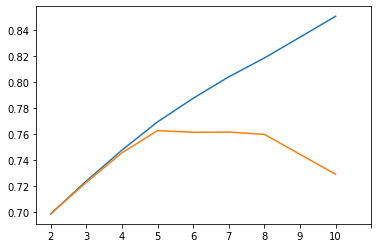

In [85]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [86]:
gcv.best_params_

{'max_depth': 5}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [87]:
pred = gcv.predict_proba(testX)

In [88]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [89]:
sample[1] = pred
sample.to_csv('submit3_bank.csv', index=None, header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [90]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [91]:
parameters2 = {"max_depth": list(range(2,11)), "min_samples_leaf": [5,10,20,50,100,500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [92]:
gcv2 = GridSearchCV(clf4, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            

4.最適なパラメータはなんだったか確かめてみよう

In [93]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 100}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [94]:
pred2 = gcv2.predict_proba(testX)

In [95]:
pred2 = pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

## LightGBM

In [104]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score


In [114]:
# parameters2 = {
#     "max_depth": list(range(2,11)),
#     'num_leaves': list(range(25, 50, 5)),
# }

# lgb = LGBMClassifier()

# gcv3 = GridSearchCV(lgb, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
# gcv3.fit(trainX, y)


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'nu

In [115]:
# print(gcv3.best_params_)

# pred3 = gcv3.predict_proba(testX)
# pred3 = pred3[:,1]

# roc_auc_score(y, gcv3.predict_proba(trainX)[:,1])
# # 0.9113408811229391

# # {'max_depth': 5, 'num_leaves': 32}
# # 0.9118745842701466


{'max_depth': 5, 'num_leaves': 30}


0.9111071609827263

In [116]:
lgb = LGBMClassifier(boosting_type='gbdt',  objective='binary', learning_rate=0.1, metric='auc', random_state=0, max_depth=5, num_leaves=32)

In [117]:
lgb.fit(trainX, y)
pred3 = lgb.predict_proba(testX)
pred3 = pred3[:,1]

roc_auc_score(y, lgb.predict_proba(trainX)[:,1])
# 0.9118745842701466


0.9118745842701466